In [45]:
import pandas as pd
import numpy as np

In [46]:
ds_train = pd.read_csv('ds/train.csv')
ds_songs = pd.read_csv('ds/songs.csv')
ds_songs_extra_info = pd.read_csv('ds/song_extra_info.csv')
ds_members = pd.read_csv('ds/members.csv')

In [47]:
ds_train.head(1)

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1


In [48]:
ds_songs.head(1)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0


Процент песен без жанров

In [49]:
print(ds_songs['genre_ids'].isna().sum() / ds_songs.shape[0])

0.04098557692307692


### Для столбца с жанрами, оставляю 1 самый популярный

In [50]:
genres_for_song = ds_songs['genre_ids'].apply(lambda x: [int(v) for v in str(x).split('|') if v != 'nan'])

In [51]:
genres = dict()
for genre_list in genres_for_song:
    for g in genre_list:
        if g not in genres:
            genres[g] = 0
        genres[g] += 1

In [52]:
sorted_genres = {k: v for k, v in reversed(sorted(genres.items(), key=lambda item: item[1]))}
sorted_genres['0'] = -1

In [53]:
def get_most_popular(g_list):
  res = '0'
  for g in g_list:
    if sorted_genres[res] < sorted_genres[g]:
      res = g
  return res

In [54]:
most_pop = []
for genre_list in genres_for_song:
  most_pop.append(get_most_popular(genre_list))

In [55]:
ds_songs['genre_ids'] = most_pop

In [56]:
ds_songs.head(10)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0
5,kKJ2JNU5h8rphyW21ovC+RZU+yEHPM+3w85J37p7vEQ=,235520,843,貴族精選,Joe Hisaishi,Hayao Miyazaki,17.0
6,N9vbanw7BSMoUgdfJlgX1aZPE1XZg8OS1wf88AQEcMc=,226220,458,伍佰 & China Blue,Jonathan Lee,NaN,3.0
7,GsCpr618xfveHYJdo+E5SybrpR906tsjLMeKyrCNw8s=,276793,465,光良 (Michael Wong),光良,彭資閔,3.0
8,oTi7oINPX+rxoGp+3O6llSltQTl80jDqHoULfRoLcG4=,228623,465,林俊傑 (JJ Lin),JJ Lin,Wu Qing Feng,3.0
9,btcG03OHY3GNKWccPP0auvtSbhxog/kllIIOx5grE/k=,232629,352,Kodaline,Stephen Garrigan| Mark Prendergast| Vincent Ma...,Stephen Garrigan| Mark Prendergast| Vincent Ma...,52.0


### Для artist_name, composer, lyricist оставляю самого первого

In [57]:
def leave_first(column):
    items = ds_songs[column].apply(lambda x: [v for v in str(x).split('|')])
    res = [v[0] for v in items]
    ds_songs[column] = res

In [58]:
leave_first('artist_name')
leave_first('composer')
leave_first('lyricist')

In [59]:
ds_songs.head(3)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,nan,nan,31.0


### Склеиваю датасеты, убираю наны

In [60]:
ds_train = ds_train.merge(ds_members,on='msno',how='left')
ds_train = ds_train.merge(ds_songs,on='song_id',how='left')
ds_train = ds_train.fillna(0)

In [61]:
pd.set_option('display.max_columns', None)
ds_train.head(3)

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,artist_name,composer,lyricist,language
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,1,0,0,7,20120102,20171005,206471.0,359,Bastille,Dan Smith,nan,52.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,13,24,female,9,20110525,20170911,284584.0,1259,Various Artists,nan,nan,52.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,13,24,female,9,20110525,20170911,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,nan,52.0


### Дропнул время регистрации, время окончания подписки и длину песни (показалось, что они очень мало влияют на target)

In [62]:
ds_train.drop(columns=['registration_init_time','expiration_date','song_length'], inplace=True)

## Язык после склеивания стал float, возвращяю его к int чтобы передать в качестве категориальной фичи

In [63]:
ds_train['language'] = ds_train['language'].astype(int).astype('category')
ds_train.head(3)

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,genre_ids,artist_name,composer,lyricist,language
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,1,0,0,7,359,Bastille,Dan Smith,nan,52
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,13,24,female,9,1259,Various Artists,nan,nan,52
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,13,24,female,9,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,nan,52


In [64]:
X_train=ds_train.sample(frac=0.8)
X_test=ds_train.drop(X_train.index)

In [65]:
y_train = X_train['target']
y_test = X_test['target']
X_train = X_train.drop(columns=['target'])
X_test = X_test.drop(columns=['target'])

In [66]:
from sklearn.metrics import roc_auc_score

In [67]:
from catboost import CatBoostClassifier

In [68]:
X_train.head(3)

,msno,song_id,source_system_tab,source_screen_name,source_type,city,bd,gender,registered_via,genre_ids,artist_name,composer,lyricist,language
1795863,wkLL4HpBLSaQqAbvMlR2WZB9WeRlxjMaq3T16FasrWE=,2VEgUYnj5ZV+8X1+ivwBb/KCsRU6TQCIdeBNbeAmYAc=,discover,Discover Genre,online-playlist,4,33,female,9,1609,Moby,Moby,nan,52
4008569,CL9FLbmWDjR3dWSxS6KU7CEbY0ZylOF5bY66ABx2udw=,MwZaD94L4Wl4APdJSVQF5JPt+xH6hb2KtWpFsjwYUlo=,my library,Local playlist more,local-library,6,21,female,9,1609,Mike Posner,Mike Posner,nan,52
812027,GiV57XpZtyMY+80JPxerXnrZzX92lremsBDSjnOJeIw=,zc9tpQChl8unHYvzWavobDxWTyYCHj/Dv+ZUFd93eA8=,my library,Local playlist more,local-library,1,0,0,7,921,Inside Llewyn Davis,nan,nan,52


In [69]:
X_train.shape

(5901934, 14)

In [70]:
X_train.shape

(5901934, 14)

In [71]:
cat_features = [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13]

In [72]:
clf = CatBoostClassifier(iterations=200, verbose=20, cat_features=cat_features)

In [73]:
clf.fit(X_train, y_train)

Learning rate set to 0.5
0:	learn: 0.6012150	total: 16.1s	remaining: 53m 31s
20:	learn: 0.5132354	total: 6m 5s	remaining: 51m 53s
40:	learn: 0.5078738	total: 11m 49s	remaining: 45m 53s
60:	learn: 0.5054047	total: 18m 7s	remaining: 41m 18s
80:	learn: 0.5035668	total: 23m 41s	remaining: 34m 48s
100:	learn: 0.5023838	total: 29m 23s	remaining: 28m 48s
120:	learn: 0.5015036	total: 35m 16s	remaining: 23m 1s
140:	learn: 0.5008644	total: 41m 2s	remaining: 17m 10s
160:	learn: 0.5002639	total: 47m 34s	remaining: 11m 31s
180:	learn: 0.4997957	total: 52m 56s	remaining: 5m 33s
199:	learn: 0.4993595	total: 59m 4s	remaining: 0us


In [74]:
import shap  # package used to calculate Shap values

In [75]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(clf)

In [76]:
# Calculate Shap values
shap_values = explainer.shap_values(X_test)

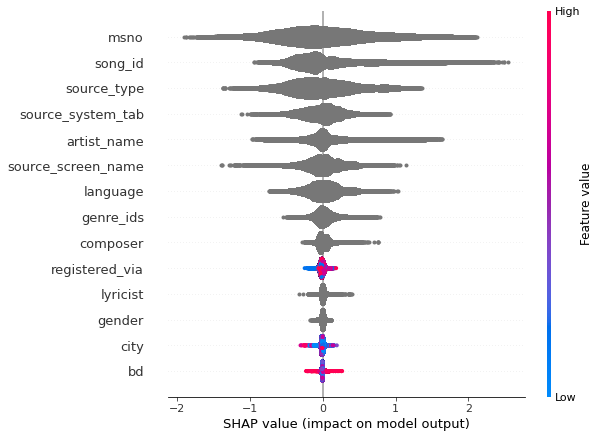

In [77]:
shap.summary_plot(shap_values, X_test)

### Важно кто послушал какую песню

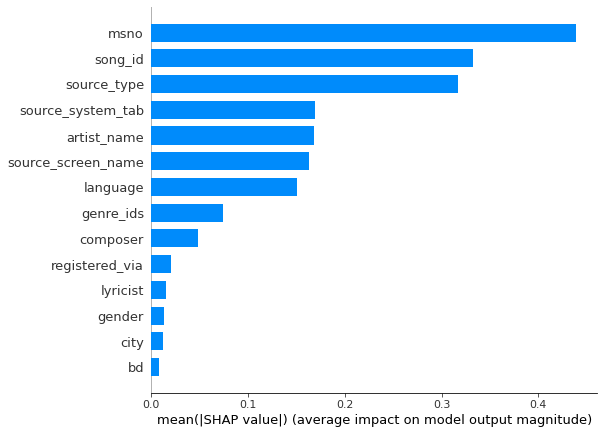

In [78]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [79]:
prediction = clf.predict(X_test)

In [80]:
print(roc_auc_score(y_test, prediction))

0.7690922439878061


In [66]:
from sklearn.model_selection import KFold

In [67]:
kf = KFold(n_splits=5)

In [68]:
ds_train = ds_train.sample(frac=1)

In [69]:
y = ds_train['target']
ds_train.drop(columns=['target'], inplace=True)

In [70]:
y = y.values
ds_train = ds_train.values

In [71]:
auc = 0

### 5-fold валидация 

In [72]:
for train_index, test_index in kf.split(ds_train):
    X_train, X_test = ds_train[train_index], ds_train[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = CatBoostClassifier(iterations=200, verbose=50, cat_features=cat_features)
    clf.fit(X_train, y_train)
    prediction = clf.predict(X_test)
    auc += roc_auc_score(y_test, prediction)

Learning rate set to 0.5
0:	learn: 0.6012035	total: 12.4s	remaining: 41m 2s
50:	learn: 0.5065397	total: 12m 31s	remaining: 36m 35s
100:	learn: 0.5021604	total: 24m 16s	remaining: 23m 48s
150:	learn: 0.5002272	total: 35m 58s	remaining: 11m 40s
199:	learn: 0.4990657	total: 47m 23s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.6012531	total: 12.4s	remaining: 41m 7s
50:	learn: 0.5064885	total: 11m 51s	remaining: 34m 38s
100:	learn: 0.5025385	total: 23m 18s	remaining: 22m 51s
150:	learn: 0.5004984	total: 34m 56s	remaining: 11m 20s
199:	learn: 0.4992940	total: 46m 2s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.6013114	total: 11.7s	remaining: 38m 55s
50:	learn: 0.5065345	total: 11m 43s	remaining: 34m 16s
100:	learn: 0.5026200	total: 23m 38s	remaining: 23m 10s
150:	learn: 0.5005150	total: 35m 15s	remaining: 11m 26s
199:	learn: 0.4993737	total: 46m 59s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.6012906	total: 11.5s	remaining: 38m 11s
50:	learn: 0.5065395	total: 11m 30s	re

### Итоговый AUC

In [74]:
auc / 5

0.7693701048448058